In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load data
mdata = pd.read_csv(r'C:\Users\nahur\Desktop\WGU\D208 Predictive Modeling\Medical Data\medical_clean.csv')
print(mdata.head())

   CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  TotalCharge Additional_charges Item1 Item2  Item3  \
0  34.34960 -86.72508  ...  3726.702860  

In [3]:
# Check for duplicates
print(mdata.duplicated().sum())

0


In [10]:
# Check for missing values
print(mdata.isna().sum())

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [ ]:
# RESEARCH QUESTION: 
# Can we predict TotalCharge using the following variables:
# Age, VitD_levels, HighBlood, Complication_risk, Arthritis, Diabetes, Anxiety, Asthma

In [4]:
print(mdata['Gender'].unique())
print(mdata['HighBlood'].unique())
print(mdata['Complication_risk'].unique())
print(mdata['Arthritis'].unique()) 
print(mdata['Diabetes'].unique())
print(mdata['Anxiety'].unique())
print(mdata['Asthma'].unique())
print(mdata['Services'].unique())

['Male' 'Female' 'Nonbinary']
['Yes' 'No']
['Medium' 'High' 'Low']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Blood Work' 'Intravenous' 'CT Scan' 'MRI']


In [5]:
# Convert categorical variables to 'category' dtype
mdata['Gender'] = mdata['Gender'].astype('category')
mdata['Services'] = mdata['Services'].astype('category')

In [6]:
# One Hot Encoding + K-1
mdata = pd.get_dummies(mdata, columns=['Gender', 'Services'], drop_first=True)

In [7]:
print(mdata.head())

   CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  Item4 Item5 Item6 Item7  Item8  Gender_Male  \
0  34.34960 -86.72508  ...      2     4     3  

In [8]:
# Ordinal Encoding

In [9]:
# HighBlood
mdata['HighBlood'] = mdata['HighBlood'].replace({"No": 0, "Yes": 1}).astype(int)
print(mdata['HighBlood'].unique())
print(mdata['HighBlood'].dtype)

[1 0]
int32


In [10]:
# Complication_risk
mdata['Complication_risk'] = mdata['Complication_risk'].replace({"Low": 0, "Medium": 1, "High": 2}).astype(int)
print(mdata['Complication_risk'].unique())
print(mdata['Complication_risk'].dtype) 

[1 2 0]
int32


In [11]:
# Arthritis
mdata['Arthritis'] = mdata['Arthritis'].replace({"No": 0, "Yes": 1}).astype(int)
print(mdata['Arthritis'].unique())
print(mdata['Arthritis'].dtype)

[1 0]
int32


In [12]:
# Diabetes
mdata['Diabetes'] = mdata['Diabetes'].replace({"No": 0, "Yes": 1}).astype(int)
print(mdata['Diabetes'].unique())
print(mdata['Diabetes'].dtype)

[1 0]
int32


In [13]:
# Anxiety
mdata['Anxiety'] = mdata['Anxiety'].replace({"No": 0, "Yes": 1}).astype(int)
print(mdata['Anxiety'].unique())
print(mdata['Anxiety'].dtype)

[1 0]
int32


In [14]:
# Asthma
mdata['Asthma'] = mdata['Asthma'].replace({"No": 0, "Yes": 1}).astype(int)
print(mdata['Asthma'].unique())
print(mdata['Asthma'].dtype)

[1 0]
int32


In [15]:
# Univariate and Bivariate Analysis 

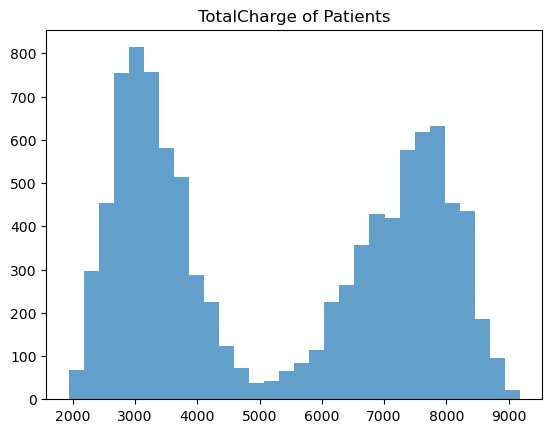

In [16]:
# TotalCharge
plt.hist(mdata['TotalCharge'], bins=30, alpha=0.7)
plt.title("TotalCharge of Patients")
plt.show()

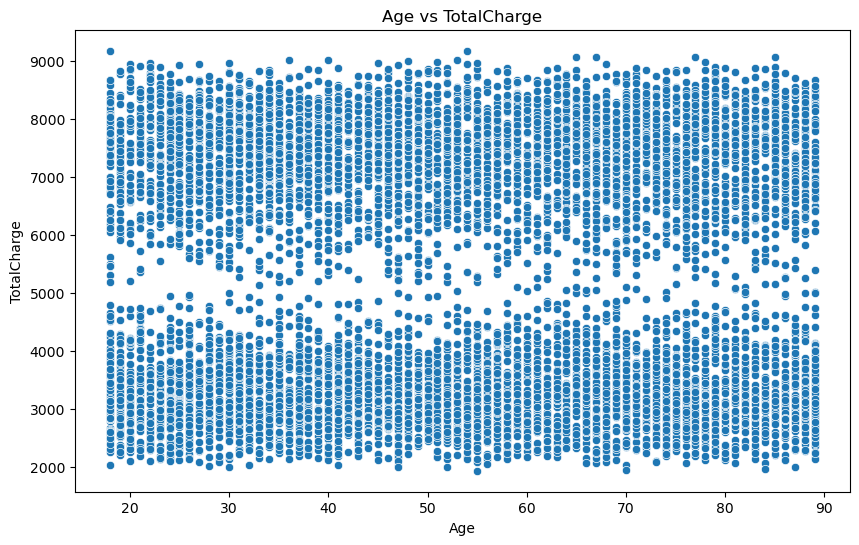

In [17]:
# Age vs TotalCharge
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mdata, x='Age', y='TotalCharge')
plt.title("Age vs TotalCharge")
plt.show()

In [18]:
print(mdata.columns)

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Gender_Male',
       'Gender_Nonbinary', 'Services_CT Scan', 'Services_Intravenous',
       'Services_MRI'],
      dtype='object')


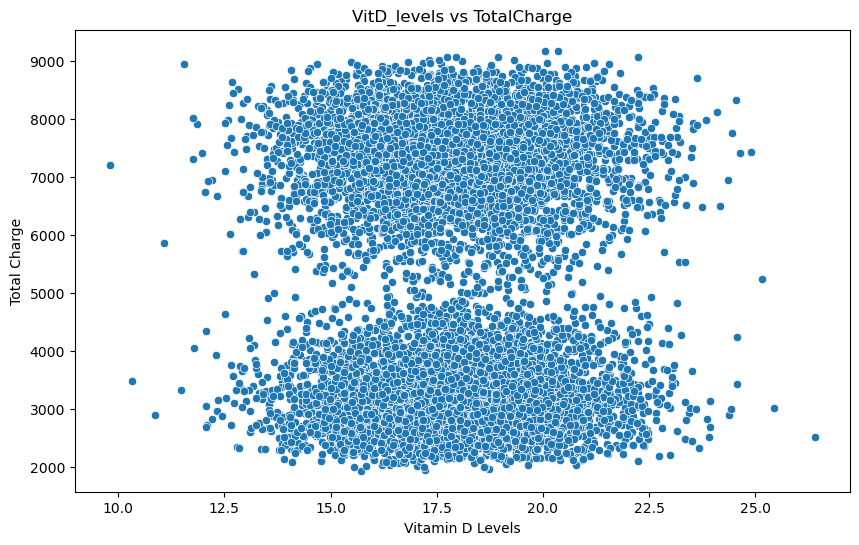

In [19]:
# VitD_Levels vs TotalCharge
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mdata, x='VitD_levels', y='TotalCharge')
plt.xlabel("Vitamin D Levels")
plt.ylabel("Total Charge")
plt.title("VitD_levels vs TotalCharge")
plt.show()

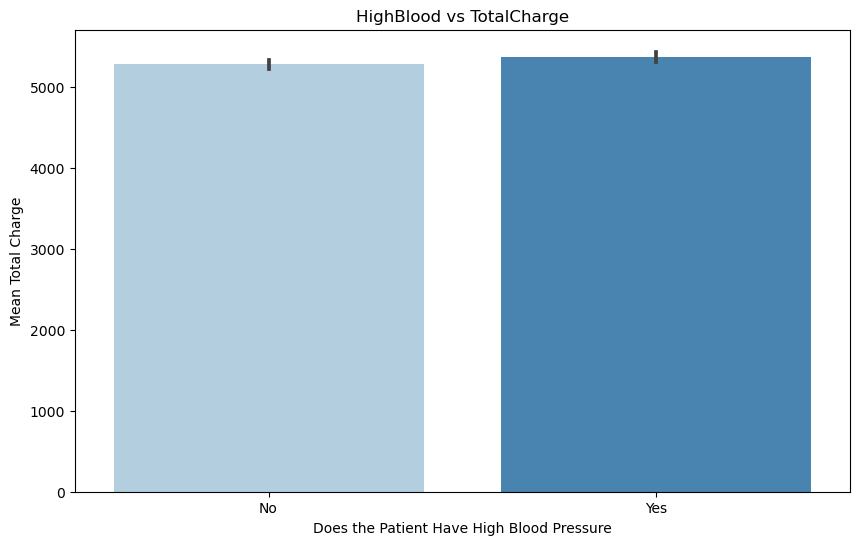

In [20]:
# HighBlood vs TotalCharge 
plt.figure(figsize=(10, 6))
sns.barplot(data=mdata, x='HighBlood', y='TotalCharge', estimator='mean', palette='Blues')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xlabel("Does the Patient Have High Blood Pressure")
plt.ylabel("Mean Total Charge")
plt.title("HighBlood vs TotalCharge")
plt.show()

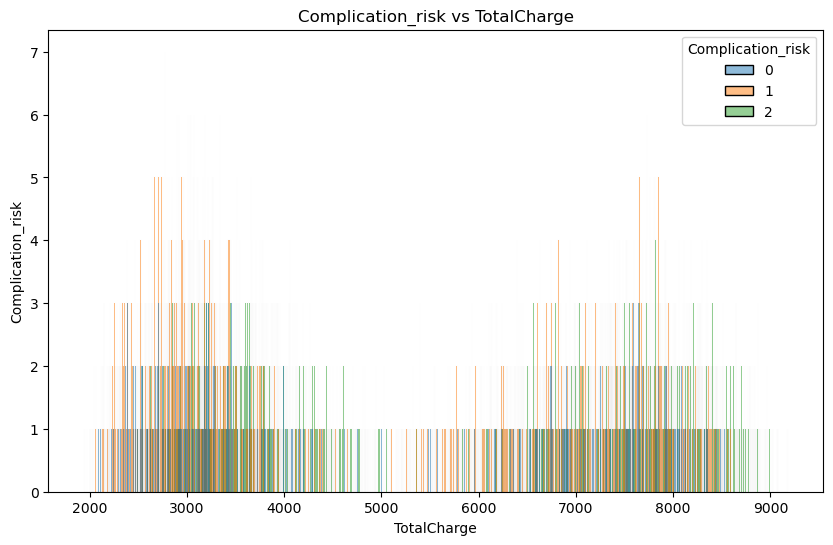

In [21]:
# Complication_risk vs TotalCharge
# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Example: Blue, Orange, Green

# Create the plot with custom colors
plt.figure(figsize=(10, 6))
sns.histplot(data=mdata, x='TotalCharge', hue='Complication_risk', bins=30, stat="count", discrete=True, palette=custom_palette)
plt.xlabel("TotalCharge")
plt.ylabel("Complication_risk")
plt.title("Complication_risk vs TotalCharge")
plt.show()

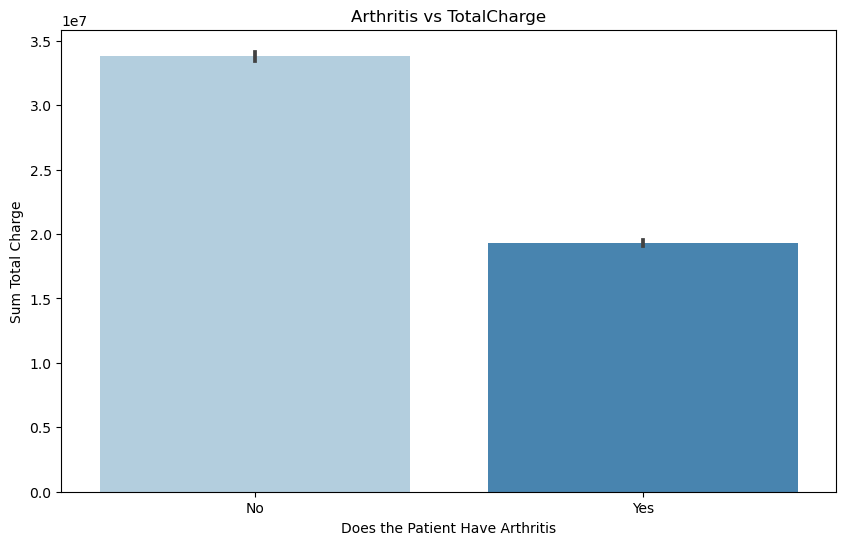

In [22]:
# Arthritis vs TotalCharge 
plt.figure(figsize=(10, 6))
sns.barplot(data=mdata, x='Arthritis', y='TotalCharge', estimator='sum', palette='Blues')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xlabel("Does the Patient Have Arthritis")
plt.ylabel("Sum Total Charge")
plt.title("Arthritis vs TotalCharge")
plt.show()

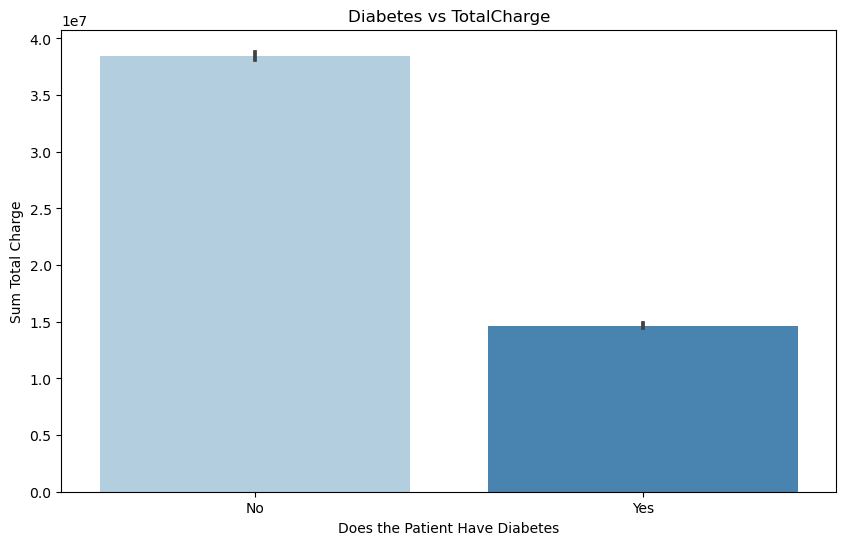

In [23]:
# Diabetes vs TotalCharge 
plt.figure(figsize=(10, 6))
sns.barplot(data=mdata, x='Diabetes', y='TotalCharge', estimator='sum', palette='Blues')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xlabel("Does the Patient Have Diabetes")
plt.ylabel("Sum Total Charge")
plt.title("Diabetes vs TotalCharge")
plt.show()

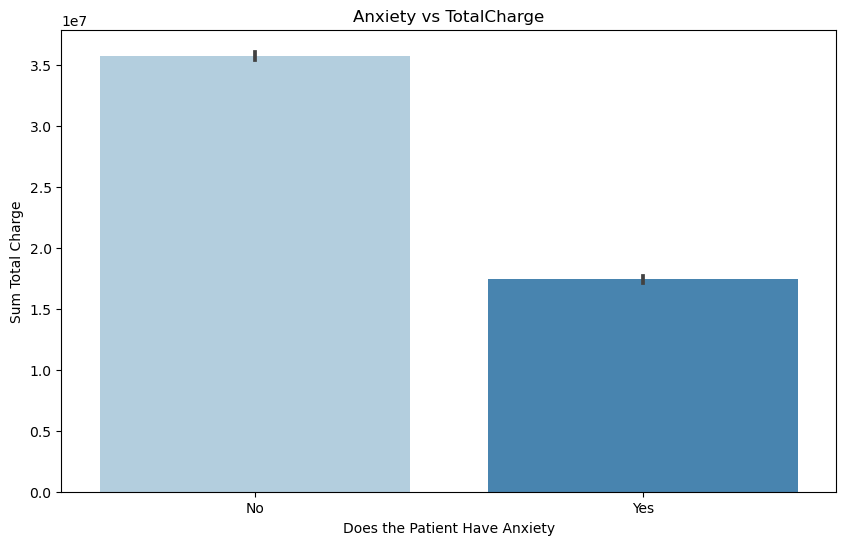

In [24]:
# Anxiety vs TotalCharge 
plt.figure(figsize=(10, 6))
sns.barplot(data=mdata, x='Anxiety', y='TotalCharge', estimator='sum', palette='Blues')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xlabel("Does the Patient Have Anxiety")
plt.ylabel("Sum Total Charge")
plt.title("Anxiety vs TotalCharge")
plt.show()

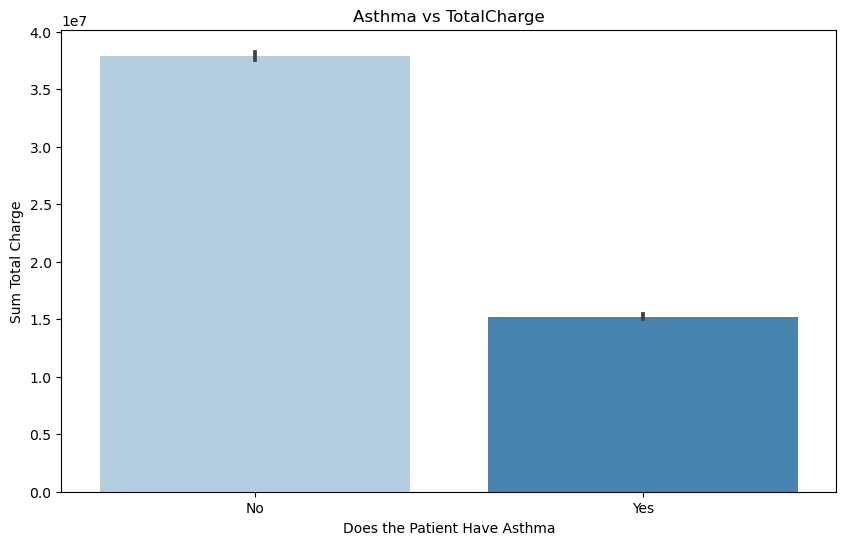

In [25]:
# Asthma vs TotalCharge 
plt.figure(figsize=(10, 6))
sns.barplot(data=mdata, x='Asthma', y='TotalCharge', estimator='sum', palette='Blues')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xlabel("Does the Patient Have Asthma")
plt.ylabel("Sum Total Charge")
plt.title("Asthma vs TotalCharge")
plt.show()

In [26]:
# Initial Model
model = ols('TotalCharge ~ Age + VitD_levels + HighBlood + Complication_risk + Arthritis + Diabetes + Anxiety + Asthma', data=mdata).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.621
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           8.69e-12
Time:                        13:48:44   Log-Likelihood:                -91027.
No. Observations:               10000   AIC:                         1.821e+05
Df Residuals:                    9991   BIC:                         1.821e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4918.2602    207.68

In [27]:
# Checking for multicollinearity 
X = model.model.exog
vif_data = pd.DataFrame()
vif_data["feature"] = model.model.exog_names
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif_data)

             feature        VIF
0          Intercept  91.279661
1                Age   1.000347
2        VitD_levels   1.000904
3          HighBlood   1.000733
4  Complication_risk   1.000833
5          Arthritis   1.000608
6           Diabetes   1.001132
7            Anxiety   1.000453
8             Asthma   1.000697


In [28]:
# Reduced Model
reduced_model = ols('TotalCharge ~ Age + VitD_levels + HighBlood + Complication_risk + Arthritis + Diabetes + Anxiety + Asthma', data=mdata).fit()

print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.621
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           8.69e-12
Time:                        13:48:49   Log-Likelihood:                -91027.
No. Observations:               10000   AIC:                         1.821e+05
Df Residuals:                    9991   BIC:                         1.821e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4918.2602    207.68

In [29]:
# Calculating Residual Standard Error in the Initial Model
residual_std_error_initial = np.sqrt(model.scale)
print(residual_std_error_initial)

2173.7763891668146


In [30]:
# Calculating Residual Standard Error in the Reduced Model
residual_std_error_reduced = np.sqrt(reduced_model.scale)
print(residual_std_error_reduced)

2173.7763891668146


In [31]:
# Predicted Values
predicted = reduced_model.predict(mdata)
print(predicted.head(5))

0    5521.428615
1    5419.506495
2    5298.306753
3    5286.550377
4    4922.601254
dtype: float64


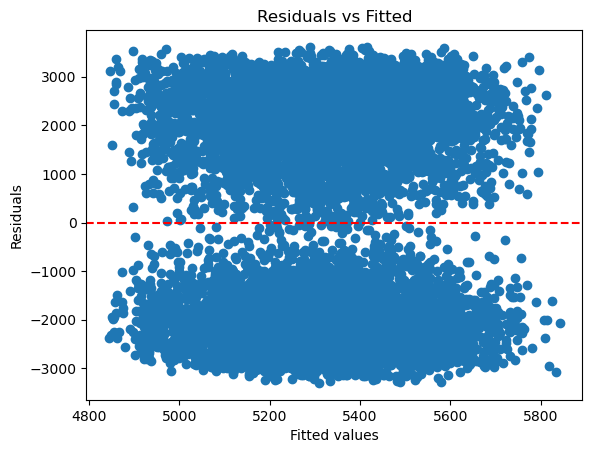

In [32]:
# Creating Residual Plots
residuals = mdata['TotalCharge'] - predicted
plt.scatter(reduced_model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

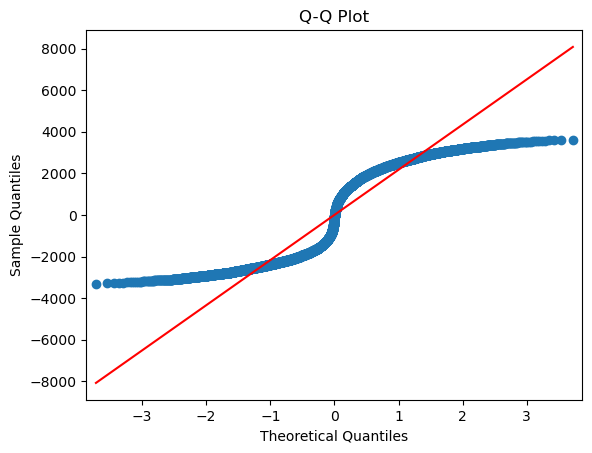

In [33]:
# Creating Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

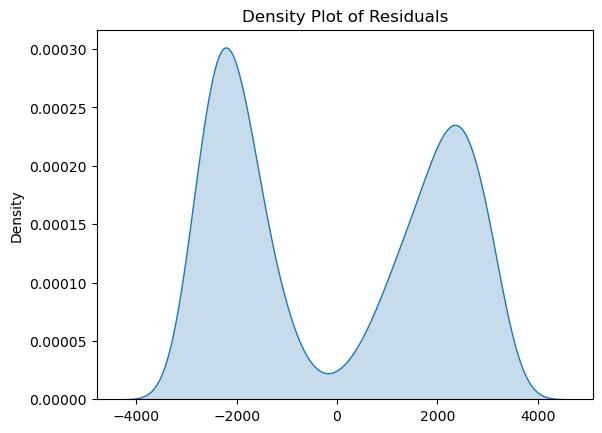

In [34]:
# Density Plot of Residuals
sns.kdeplot(residuals, fill=True)
plt.title('Density Plot of Residuals')
plt.show()